## Numerical Methods Week 4
# Interpolation I
## Based on Tim Sauer's "Numerical Analysis" (Chapter 3, 3.1-3.2)

## 3.1 Data and Interpolating Functions

*Definition*. The function $y = P(x)$ **interpolates** the data points $(x_1,y_1), \ldots,(x_n,y_n)$ in the plane if $P(x_i) = y_i$ for each $1 \leq i \leq n$. 

Notice that all the $x_i$'s need to be distinct!

### 3.1.1 Lagrange polynomial interpolation

Given three points $(x_1,y_1), (x_2,y_2), (x_3,y_3)$ in the plane, the **Lagrange interpolating polynomial** of degree two is:

$$P_2(x) = y_1\frac{(x - x_2)(x - x_3)}{(x_1 - x_2)(x_1 - x_3)} +
y_2\frac{(x - x_1)(x - x_3)}{(x_2 - x_1)(x_2 - x_3)} +
y_3\frac{(x - x_1)(x - x_2)}{(x_3 - x_1)(x_3 - x_2)}$$

In general, given $n$ points $(x_1,y_1), \ldots, (x_n,y_n)$ in the plane, for each $k = 1, \ldots, n - 1$, define the $n - 1 $ degree polynomial:

$$L_k(x) = \frac{(x - x_1) \cdots (x - x_{k-1})(x - x_{k+1}) \cdots (x - x_n)}
{(x_k - x_1) \cdots (x_k - x_{k-1})(x_k - x_{k+1}) \cdots (x_k - x_n)}$$

Notice that $L_k(x_k) = 1$, while $L_k(x_j) = 0$, where $x_j$ is any of the other data points. Then define the degree $n − 1$ polynomial:

$$P_{n-1}(x) = y_1 L_1(x) + \cdots + y_n L_n(x)$$

*Theorem*. (**Main Theorem of Polynomial Interpolation**.) Let $(x_1,y_1), \ldots, (x_n,y_n)$ be $n$ points in the plane with distinct $x_i$. Then there exists one and only one polynomial $P$ of degree $n − 1$ or less that satisfies $P(x_i) = y_i$, for $i = 1, \ldots, n$.

In [1]:
from sympy import Symbol, simplify, lambdify
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator


def interpolate_lagrange(x, x_values, y_values):
    """
    x : value at which to evaluate y, should be between min and max x_values
    x_values: list or numpy array containing values of x
    y_values: list or numpy array contaning values of y
    """
    def _basis(j):
        p = [(x - x_values[m])/(x_values[j] - x_values[m]) for m in range(k) if m != j]
        return reduce(operator.mul, p)
    assert len(x_values) != 0 and (len(x_values) == len(y_values)), 'x and y cannot be empty and must have the same length'
    k = len(x_values)
    return sum(_basis(j)*y_values[j] for j in range(k)) 

### <span style="color:#19bfc2">EXAMPLE 3.1</span>

Find the interpolating polynomial for the data points $(0,1),(2,2),$ and $(3,4)$.

In [2]:
points=[[0,1],[2,2],[3,4]]

x_values=[p[0] for p in points]
y_values=[p[1] for p in points]
x = Symbol('x')
poly = simplify(interpolate_lagrange(x,x_values,y_values))
poly

x**2/2 - x/2 + 1

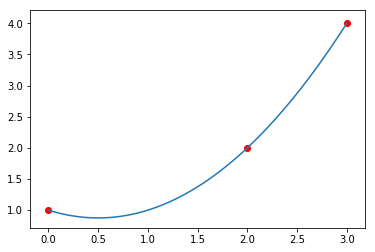

In [3]:
x1 = np.linspace(min(x_values), max(x_values), 100)
y1 = lambdify(x, poly)(x1)

fig, ax = plt.subplots()
ax.plot(x1, y1)
ax.scatter(x_values,y_values, c = 'r')
plt.show()

### <span style="color:#19bfc2">EXAMPLE 3.2</span>

Find the interpolating polynomial for the data points $(0, 2), (1, 1), (2, 0)$, and $(3, −1)$.

In [4]:
points=[[0,2],[1,1],[2,0],[3,-1]]

x_values=[p[0] for p in points]
y_values=[p[1] for p in points]
x = Symbol('x')
poly = simplify(interpolate_lagrange(x,x_values,y_values))
poly

2 - x

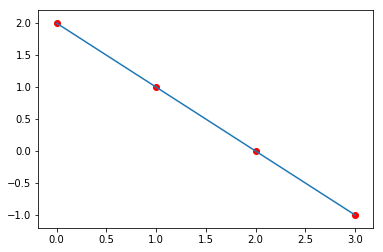

In [5]:
x1 = np.linspace(min(x_values), max(x_values), 100)
y1 = lambdify(x, poly)(x1)

fig, ax = plt.subplots()
ax.plot(x1, y1)
ax.scatter(x_values,y_values, c = 'r')
plt.show()

### 3.1.2 Newton's divided differences

*Notation*. Denote by $f[x_1 \ldots x_n]$ the coefficient of the $x_{n−1}$ term in the (unique) polynomial that interpolates $(x_1,f(x_1)), \ldots,(x_n,f(x_n))$.

Using this notation, the following somewhat remarkable alternative formula for the interpolating polynomial holds, called the **Newton’s divided difference formula**:

$$
\begin{align}
P(x) = f[x_1] &+ f[x_1 \,\, x_2](x - x_1)\\
&+f[x_1 \,\, x_2 \,\, x_3](x - x_1)(x - x_2)\\
&+f[x_1 \,\, x_2 \,\, x_3 \,\, x_4](x - x_1)(x - x_2)(x - x_3)\\
&+ \cdots\\
&+f[x_1 \cdots x_n](x - x_1) \cdots (x - x_{n-1})
\end{align}
$$

Moreover, the coefficients $f[x_1 \cdots x_k]$ can be recursively calculated as follows:

$$
\begin{align}
f[x_k] &= f(x_k)\\
f[x_k \,\, x_{k+1}] &= \frac{f[x_{k+1}] - f[x_k]}{x_{k+1} - x_k}\\
f[x_k \,\, x_{k+1} \,\, x_{k+2}] &= \frac{f[x_{k+1} \,\, x_{k+2}] - f[x_k \,\, x_{k+1}]}{x_{k+2} - x_k}\\
f[x_k \,\, x_{k+1} \,\, x_{k+2} \,\, x_{k+3}] &= \frac{f[x_{k+1} \,\, x_{k+2} \,\, x_{k+3}] - f[x_k \,\, x_{k+1} \,\, x_{k+2}]}{x_{k+3} - x_k}\\
&\mbox{and so on}
\end{align}
$$

In [6]:
import numpy as np
from sympy import Rational, Poly

def getNDDCoeffs(x, y):
    """ Creates NDD pyramid and extracts coeffs """
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) # Create a square matrix to hold pyramid
    pyramid[::,0] = y # first column is y
    for j in range(1,n):
        for i in range(n-j):
            # create pyramid by updating other columns
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
    return pyramid[0] # return first row

def NDD_poly(coeff_vector,x,nt=0):
    # create the unique polynomial of degree at most equal to size of data minus one 
    final_pol = np.polynomial.Polynomial([0.]) # our target polynomial
    n = coeff_vector.shape[0] # get number of coeffs
    for i in range(n):
        p = np.polynomial.Polynomial([1.]) # create a dummy polynomial
        for j in range(i):
            # each vector has degree of i
            # their terms are dependant on 'x' values
            p_temp = np.polynomial.Polynomial([-x[j], 1.]) # (x - x_j)
            p = np.polymul(p, p_temp) # multiply dummy with expression
        p *= coeff_vector[i] # apply coefficient
        final_pol = np.polyadd(final_pol, p) # add to target polynomial
    p = np.flip(final_pol[0].coef, axis=0)
    y=Symbol('x')
    pp = []
    for i in p.tolist():
        if nt==0:
            pp.append(Rational(i))
        else:
            pp.append(i)
    p1=Poly(pp, y)
    return p1.as_expr()

### <span style="color:#19bfc2">EXAMPLE 3.3</span>

Use divided differences to find the interpolating polynomial passing through the points $(0, 1), (2, 2), (3, 4)$.

In [7]:
points=[[0,1],[2,2],[3,4]]

x=np.array([p[0] for p in points])
y=np.array([p[1] for p in points])

coeff_vector = getNDDCoeffs(x, y)
print("The upper side of Newton's divided difference triangle is:",coeff_vector)

The upper side of Newton's divided difference triangle is: [1.  0.5 0.5]


In [8]:
print("The Newton's divided difference polynomial is:")
NDD_poly(coeff_vector,x)

The Newton's divided difference polynomial is:


x**2/2 - x/2 + 1

### <span style="color:#19bfc2">EXAMPLE 3.4</span>

Add the fourth data point $(1,0)$ to the list in Example 3.3.

In [9]:
points=[[0,1],[2,2],[3,4],[1,0]]

x=np.array([p[0] for p in points])
y=np.array([p[1] for p in points])

coeff_vector = getNDDCoeffs(x, y)
print("The upper side of Newton's divided difference triangle is:",coeff_vector)

The upper side of Newton's divided difference triangle is: [ 1.   0.5  0.5 -0.5]


In [10]:
print("The Newton's divided difference polynomial is:")
NDD_poly(coeff_vector,x)

The Newton's divided difference polynomial is:


-x**3/2 + 3*x**2 - 7*x/2 + 1

### <span style="color:#19bfc2">EXAMPLE 3.5</span>

Use Newton’s divided differences to find the interpolating polynomial passing through $(0, 2), (1, 1), (2, 0), (3, −1)$.

In [11]:
points=[[0,2],[1,1],[2,0],[3,-1]]

x=[p[0] for p in points]
y=[p[1] for p in points]

coeff_vector = getNDDCoeffs(x, y)
print("The upper side of Newton's divided differences triangle is:",coeff_vector)

The upper side of Newton's divided differences triangle is: [ 2. -1.  0.  0.]


In [12]:
print("The Newton's divided difference polynomial is:")
NDD_poly(coeff_vector,x)

The Newton's divided difference polynomial is:


2 - x

### 3.1.3 How many degree $d$ polynomials pass through $n$ points?

Let $P_{n-1}(x)$ be the unique polynomial of degree $\leq n - 1$ interpolating the $n$ points $(x_1,y_1), \ldots, (x_n,y_n)$. Then, for every $m \geq n$, there exist infinitely many polynomials of degree $m$ given by the following one-parametric family of polynomials:

$$P_m(x) = P_{n-1}(x) + c x^{m - n + 1} (x - x_1) \cdots (x - x_n)$$

In [13]:
from sympy import factor, expr

def NDD_poly_higher(coeff_vector,xv,d,nt=0):
    # create an one-parametric family of polynomials of degree at least equal to size of data
    # d = m - n
    final_pol = np.polynomial.Polynomial([0.]) # our target polynomial
    n = coeff_vector.shape[0] # get number of coeffs
    for i in range(n):
        p = np.polynomial.Polynomial([1.]) # create a dummy polynomial
        for j in range(i):
            # each vector has degree of i
            # their terms are dependant on 'x' values
            p_temp = np.polynomial.Polynomial([-x[j], 1.]) # (x - x_j)
            p = np.polymul(p, p_temp) # multiply dummy with expression
        p *= coeff_vector[i] # apply coefficient
        final_pol = np.polyadd(final_pol, p) # add to target polynomial
    p = np.flip(final_pol[0].coef, axis=0)
    y=Symbol('x')
    pp = []
    for i in p.tolist():
        if nt==0:
            pp.append(Rational(i))
        else:
            pp.append(i)
#         pp.append(Rational(i))
    pl=Poly(pp, y)
    c=Symbol('c')
    lp=None
    xx=xv.copy()
    if d>0:
        for i in range(d):
            xx.append(0)
    for i in xx:
        if lp ==None:
            lp = Poly(y-i)
        else:
            lp *= Poly(y-i)
    llp=pl + c*lp
    px=Symbol('P(x)')
    plx = px + c*lp
    return plx.as_expr(), llp.as_expr(), factor(lp), factor(lp)*c + px

### <span style="color:#19bfc2">EXAMPLE 3.6</span>

How many polynomials of each degree $0 \leq d \leq 5$ pass through the points $(−1, −5), (0,−1),(2,1)$, and $(3,11)$?

In [14]:
# There is a unique polynomial of degree 3 interpolating the four points. 
# Therefore there are no interpolating polynomials of degrees 0, 1, and 2.

points=[[-1,-5],[0,-1],[2,1],[3,11]]

x=[p[0] for p in points]
y=[p[1] for p in points]

coeff_vector = getNDDCoeffs(x, y)
print("The upper side of Newton's divided differences triangle is:",coeff_vector)
print("The Newton's divided difference polynomial is:")
NDD_poly(coeff_vector,x)

The upper side of Newton's divided differences triangle is: [-5.  4. -1.  1.]
The Newton's divided difference polynomial is:


x**3 - 2*x**2 + x - 1

In [15]:
# The infinitely many polynomials of degree 4 are given by:

n=len(x)
first=NDD_poly_higher(coeff_vector,x,0)[3]
print("The infinitely many polynomials of degree", n, "are:")
first

The infinitely many polynomials of degree 4 are:


P(x) + c*x*(x - 3)*(x - 2)*(x + 1)

In [16]:
second=NDD_poly_higher(coeff_vector,x,0)[1]
print("The infinitely many polynomials of degree", n, "are in expanded form:")
second

The infinitely many polynomials of degree 4 are in expanded form:


c*x**4 + x**3*(1 - 4*c) + x**2*(c - 2) + x*(6*c + 1) - 1

In [17]:
# The infinitely many polynomials of degree 5 are given by:

n=len(x)
first=NDD_poly_higher(coeff_vector,x,1)[3]
print("The infinitely many polynomials of degree", n+1, "are:")
first

The infinitely many polynomials of degree 5 are:


P(x) + c*x**2*(x - 3)*(x - 2)*(x + 1)

In [18]:
second=NDD_poly_higher(coeff_vector,x,1)[1]
print("The infinitely many polynomials of degree", n+1, "are in expanded form:")
second

The infinitely many polynomials of degree 5 are in expanded form:


c*x**5 - 4*c*x**4 + x**3*(c + 1) + x**2*(6*c - 2) + x - 1

### 3.1.5 Representing functions by approximating polynomials

A major use of polynomial interpolation is to replace evaluation of a complicated function by evaluation of a polynomial, which involves only elementary computer operations like addition, subtraction, and multiplication. Think of this as a form of compression: Something complex is replaced with something simpler and computable, with perhaps some loss in accuracy that we will have to analyze. Let us give an example from trigonometry.

### <span style="color:#19bfc2">EXAMPLE 3.7</span>

Interpolate the function $f(x) = sin x$ at 4 equally spaced points on $[0,\pi/2]$.

In [19]:
x=[0.,np.pi/6,np.pi/3, np.pi/2]
y=[np.sin(0),np.sin(np.pi/6),np.sin(np.pi/3),np.sin(np.pi/2)]

coeff_vector = getNDDCoeffs(x, y)
print("The upper side of Newton's divided differences triangle is:",coeff_vector)
print("The Newton's divided difference polynomial is:")
sp=NDD_poly(coeff_vector,x,nt=1)

from sympy import latex

px=Symbol("P_{3}(x) = ")  
spl=px+sp
spl

The upper side of Newton's divided differences triangle is: [ 0.          0.95492966 -0.24434036 -0.1138719 ]
The Newton's divided difference polynomial is:


P_{3}(x) =  - 0.113871899071412*x**3 - 0.0654708032116358*x**2 + 1.02042871862363*x

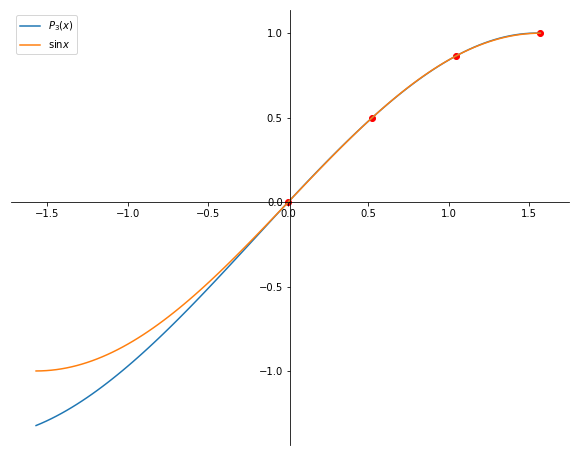

In [20]:
from sympy import poly

cop=poly(sp).coeffs()
cop=np.array(cop)
cop=np.insert(cop,len(cop),float(0))
ip=np.poly1d(cop)

fig = plt.figure(figsize=(10,8))  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')  #center')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

xx = np.linspace(-max(x), max(x), 100)
plt.plot(xx, ip(xx),label="$P_3(x)$")
ax.scatter(x,y, c = 'r')
plt.plot(xx, np.sin(xx),label="$\sin x$")
ax.legend(loc='upper left')
plt.show()

## 3.2 Interpolation Error

### 3.2.1 Interpolation error formula

### <span style="color:#19bfc2">EXAMPLE 3.8</span>

### 3.2.3 Runge phenomenon

### <span style="color:#19bfc2">EXAMPLE 3.9</span>